In [36]:
import csv
import pandas as pd
import re
import emoji
import nltk
from ekphrasis.classes.segmenter import Segmenter
import preprocessor as p
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('words')
words = set(nltk.corpus.words.words())

#column_name = ['Date','Tweet']
origin = pd.read_csv("Elon Musk.csv")

Tweet_tgt = origin.text

[nltk_data] Downloading package words to /Users/ZhaoLi/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [37]:
#segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus='twitter')

data = []
#forming a separate feature for cleaned tweets
for i,v in enumerate(Tweet_tgt):
    data.append(p.clean(v))

nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

#Remove punctuations in a tweet
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        if new_word != '':
            new_words.append(new_word)
    return new_words

lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()

def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]


df = pd.DataFrame(data,columns=["Tweet"])
stop_words = set(stopwords.words('english'))
cleaned_data = df.apply(lambda x: [item for item in \
x if item not in stop_words])

Reading twitter - 1grams ...
Reading twitter - 2grams ...


[nltk_data] Downloading package wordnet to /Users/ZhaoLi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ZhaoLi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
z = lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip())

full_data = []

#Remove some irrelevant information in a tweet
for i in cleaned_data["Tweet"]:
    result = []
    sentence = z(i.replace("b'RT :", "").replace("b'","").replace('b"RT', ''))
    sentence = sentence.strip()
    cleaned_sentence = sentence.split()
    cleaned_sentence = list(filter(lambda x:x[0:1]!= "\\", sentence.split()))
    
    for j in cleaned_sentence:
        sep = '\\'
        stripped = j.split(sep, 1)[0]
        result.append(stripped)

    full_data.append(result)
print(full_data)

[['Will', 'make', 'a', 'big', 'difference'], ['No,', 'bottom', 'static', 'aero', 'pushes', 'engine', 'section', 'back,', 'counteracting', 'Starships', 'low', 'center', 'of', 'mass', 'on', 'reentry', 'caused', 'by', 'the', 'engine', 'section.', 'Aiming', 'for', 'to', 'deg', 'angle', 'of', 'attack', 'during', 'high', 'heating', 'portion', 'of', 'flight.', 'Dont', 'want', 'to', 'reenter', 'with', 'engines', 'blasted', 'by', 'plasma.'], ['Low', 'center', 'of', 'mass.', 'Bit', 'like', 'our', 'ship', '&amp;', 'booster', 'on', 'reentry.'], ['Same'], [], [], ['Probably', 'slightly', 'further', 'forward,', 'smaller,', 'more', 'inward.', 'No', 'funny', 'looking', 'static', 'aero', 'at', 'top,', 'as', 'static', 'aero', 'no', 'longer', 'directly', 'in', 'flow.'], ['Btw,', 'theres', 'a', 'slight', 'error', 'with', 'forward', 'flap', 'design.', 'Moving', 'section', 'is', 'needed', 'for', 'control,', 'but', 'passive', 'section', 'is', 'counter-productive,', 'as', 'it', 'pushes', 'nose', 'backwards.',

In [35]:
cnt = 0
doge_dict = {}
origin["Date"] = pd.to_datetime(origin.created_at)
origin["Date"] = origin["Date"].dt.date

for i in range(len(df)):
    if any("doge" in s.lower() for s in full_data[i]):
        cnt += 1
        if str(origin['Date'][i]) in doge_dict:
            doge_dict[str(origin['Date'][i])] += 1
        else:
            doge_dict[str(origin['Date'][i])] = 1
        #doge_list.append(df['Tweet'][i])
        #print(origin['created_at'][i], full_data[i])
print("Elon has mentioned Doge " + str(cnt) + " times in his tweets")
print(doge_dict)

Elon has mentioned Doge 47 times in his tweets
{'2021-07-17': 1, '2021-07-13': 1, '2021-07-09': 1, '2021-07-02': 1, '2021-07-01': 2, '2021-05-25': 2, '2021-05-24': 2, '2021-05-20': 3, '2021-05-16': 3, '2021-05-13': 1, '2021-05-11': 1, '2021-05-09': 1, '2021-04-28': 1, '2021-04-15': 2, '2021-04-01': 1, '2021-03-18': 1, '2021-03-15': 1, '2021-03-13': 3, '2021-03-06': 1, '2021-03-02': 2, '2021-03-01': 1, '2021-02-21': 1, '2021-02-20': 1, '2021-02-14': 2, '2021-02-11': 2, '2021-02-10': 1, '2021-02-08': 1, '2021-02-07': 1, '2021-02-06': 1, '2021-02-04': 3, '2020-12-20': 1, '2020-11-17': 1}


In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
total_sentiment = 0
for sentence in full_data:
    vs = analyzer.polarity_scores(' '.join(sentence))
    print("{:-<65} {}".format(' '.join(sentence), str(vs)))
    total_sentiment += vs['compound']


    print(total_sentiment)

Will make a big difference--------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
No, bottom static aero pushes engine section back, counteracting Starships low center of mass on reentry caused by the engine section. Aiming for to deg angle of attack during high heating portion of flight. Dont want to reenter with engines blasted by plasma. {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.6621}
Low center of mass. Bit like our ship &amp; booster on reentry.-- {'neg': 0.144, 'neu': 0.685, 'pos': 0.171, 'compound': 0.1027}
Same------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
----------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Probably slightly further forward, smaller, more inward. No funny lo

Austin++--------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
No it doesnt hurt at all----------------------------------------- {'neg': 0.245, 'neu': 0.446, 'pos': 0.309, 'compound': 0.1471}
True------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
I fried a lot of neurons on that problem!------------------------ {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'compound': -0.4574}
Me in my sick new car(left him the money)------------------------ {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.5106}
Had no money to invest in Zip2, but my founder equity yielded ~$15M after tax. Of that, I rolled ~$10M into PayPal, which yielded ~$180M, then Basic principle is that I would not ask investors to risk money on my company if I would not also do so. {'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.5023}
Major new Supercharger station coming to Santa Monica soon! Ho

Yeah------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}
I was going to say Sim!, but that seemed too obvious haha-------- {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.6476}
Deveras!--------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
And cases with high (non-infectious) Ct should quarantine for a few days, while getting another test. Second test determines whether theyre just beginning to get ill or are on the long tail afterwards, where viral fragments exist, but person is not infectious. {'neg': 0.044, 'neu': 0.956, 'pos': 0.0, 'compound': -0.2263}
So many things you want &amp; some you didnt know you wanted----- {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.0772}
Maybe a little Mercy--------------------------------------------- {'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.2975}
Tesla holiday software release is---------------------

In [60]:
#Remove the most common words we used daily
total = []
for i in full_data:
    total += i

common = ['The','I', ':','&amp;', 'all', 'just', 'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once']

not_common = []
for i in total:
    if i not in common:
        not_common.append(i)

from collections import Counter

counter = Counter(not_common).most_common()

print(counter)

[('Tesla', 182), ('This', 111), ('We', 98), ('would', 91), ('much', 89), ('like', 88), ('launch', 75), ('make', 71), ('high', 71), ('It', 66), ('Starship', 65), ('production', 62), ('Yes', 61), ('Its', 61), ('great', 60), ('need', 58), ('next', 57), ('Falcon', 57), ('first', 55), ('work', 52), ('new', 52), ('SpaceX', 52), ('one', 52), ('FSD', 51), ('If', 50), ('good', 50), ('That', 49), ('get', 49), ('many', 49), ('time', 48), ('even', 48), ('engine', 47), ('booster', 46), ('.', 46), ('year', 46), ('people', 46), ('Haha', 46), ('probably', 45), ('A', 43), ('haha', 42), ('could', 41), ('car', 40), ('Yeah,', 40), ('You', 39), ('use', 39), ('Model', 39), ('Will', 38), ('Great', 38), (',', 37), ('go', 37), ('best', 37), ('hard', 37), ('landing', 37), ('also', 37), ('Starlink', 37), ('soon', 36), ('There', 36), ('way', 36), ('engines', 35), ('orbit', 35), ('dont', 35), ('better', 35), ('still', 35), ('back', 34), ('coming', 34), ('Earth', 34), ('Just', 34), ('beta', 34), ('Dragon', 34), ('n

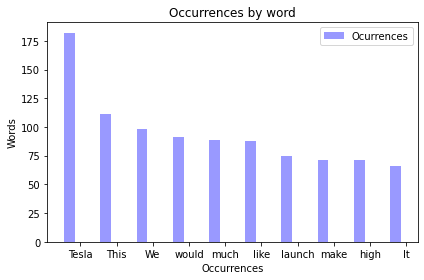

In [72]:
import matplotlib.pyplot as plt
import numpy as np

data = counter[:10]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

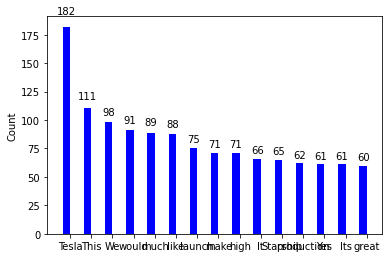

In [62]:
import numpy as np
import matplotlib.pyplot as plt


data = counter[:15]
#names, values = zip(*data)  # @comment by Matthias
names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(data))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)



def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()